### **Project Title: Fertilizer Recommendation System Based on Soil & Crop Type using Random Forest** ##

### **Project Description:**
In agriculture, selecting the right fertilizer is crucial for maximizing crop yield and maintaining soil health. However, farmers often lack access to scientific tools that can guide them toward the most suitable fertilizer based on local soil conditions and crop types. This project aims to bridge that gap by developing a machine learning-based Fertilizer Recommendation System using the Random Forest algorithm.

The system takes into account important environmental and agricultural parameters such as temperature, humidity, soil moisture, soil type, crop type, and nutrient levels (Nitrogen, Phosphorus, Potassium). By analyzing these features, the model accurately predicts the most appropriate fertilizer for optimal crop growth. The solution is lightweight, fast, and easy to integrate into mobile or web-based platforms for real-time agricultural support.

### **Project Objectives:**
+ To build a robust Random Forest model that can accurately classify and recommend fertilizers based on soil and crop attributes.

+ To preprocess and analyze the dataset to uncover patterns between environmental factors and fertilizer usage.

+ To deploy the model for real-world usability using tools like Flask, Streamlit, or web APIs (optional).

+ To support data-driven farming and reduce the misuse or overuse of fertilizers, thereby promoting sustainable agriculture.


### **Step 1 :- Define the Problem**

##### **Type:** Classification – predict the recommended Fertilizer type
##### **Model:** RandomForestClassifier


### **Step 2:- Import Libraries**

#### **pandas:** Used for data manipulation and analysis, offering powerful data structures like DataFrames to handle and process structured data efficiently.
#### **matplotlib.pyplot:** Used for cremating static, interactive, and animated visualizations in Python, enabling plotting of various graphs such as line charts, scatter plots, and histograms.
#### **seaborn:** A data visualization library built on matplotlib, providing a high-level interface to create statistical graphics such as heatmaps, pair plots, and box plots.
#### **warnings.warn:** To manage and suppress unnecessary warning messages during code execution.

#### **sklearn.preprocessing:**
#### **LabelEncoder:** To convert categorical features into numeric format suitable for model training.

#### **sklearn.model_selection:**
#### **train_test_split:** Splits the dataset into training and testing sets, ensuring an appropriate balance for model training and validation.  

#### **sklearn.ensemble:**
#### **RandomForestClassifier:** To build a robust and high-performing ensemble classifier using multiple decision trees.

#### **sklearn.metrics:**
#### **accuracy_score, classification_report, confusion_matrix:** To evaluate the performance of the model using key metrics like accuracy, precision, recall, and the confusion matrix.

#### **sklearn.model_selection:**
#### **GridSearchCV:** To perform hyperparameter tuning by exhaustively searching over specified parameter values for the model.




In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings.warn

### **Step 3:- Load the dataset**

In [6]:
df = pd.read_csv('fertilizer_recommendation.csv')


In [8]:
df.head()

,Temperature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Phosphorus,Potassium,Fertilizer
0,35.322292,15.980625,14.522961,Clayey,Rice,44,84,40,17-17-17
1,23.984480,49.597764,43.047358,Sandy,Cotton,36,79,28,14-35-14
2,30.869379,10.830022,43.287254,Sandy,Maize,127,31,39,20-20
3,40.787061,37.982422,18.520513,Sandy,Rice,60,8,46,20-20
4,21.660016,15.269021,37.760771,Loamy,Wheat,52,92,55,Urea


In [10]:
df.shape

(100, 9)

### **Step 4:- Exploratory Data Analysis (EDA)**

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  100 non-null    float64
 1   Humidity     100 non-null    float64
 2   Moisture     100 non-null    float64
 3   Soil_Type    100 non-null    object 
 4   Crop_Type    100 non-null    object 
 5   Nitrogen     100 non-null    int64  
 6   Phosphorus   100 non-null    int64  
 7   Potassium    100 non-null    int64  
 8   Fertilizer   100 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 7.2+ KB


In [16]:
df.describe()

,Temperature,Humidity,Moisture,Nitrogen,Phosphorus,Potassium
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,33.592394,50.383104,34.815729,66.180000,50.790000,53.620000
std,7.144109,25.419378,14.683410,41.160779,26.986452,26.618813
min,20.123083,10.012382,10.137981,2.000000,5.000000,8.000000
25%,27.250310,27.204323,22.750129,35.000000,30.000000,32.000000
50%,34.034239,50.951868,35.428249,64.000000,51.000000,52.000000
75%,39.645428,73.891279,46.738831,102.250000,75.000000,76.250000
max,44.831066,89.813811,59.000622,137.000000,99.000000,99.000000


In [79]:
df['Fertilizer'].value_counts()

Fertilizer
2    18
1    17
4    16
0    15
3    12
5    12
6    10
Name: count, dtype: int64

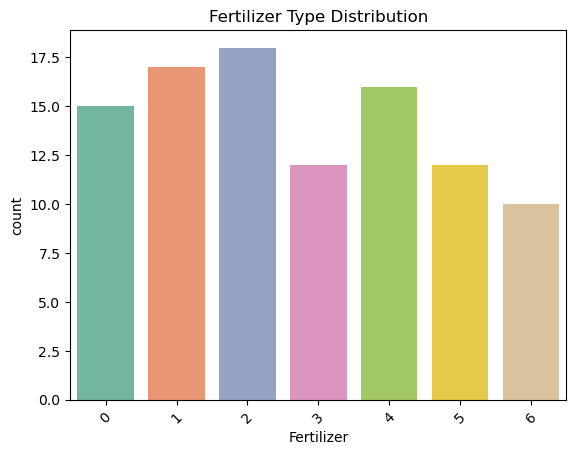

In [81]:
## To Understand which fertilizer types are most commonly recommended.

sns.countplot(data=df, x='Fertilizer', hue='Fertilizer', palette='Set2', legend=False)
plt.title('Fertilizer Type Distribution')
plt.xticks(rotation=45)
plt.show()



##### **Insights:-**
- We find that fertilizers like Urea, 20-20, or DAP are recommended more frequently.

- Some fertilizers might only be used in very specific conditions.

- If one type dominates, our model might need balancing techniques.



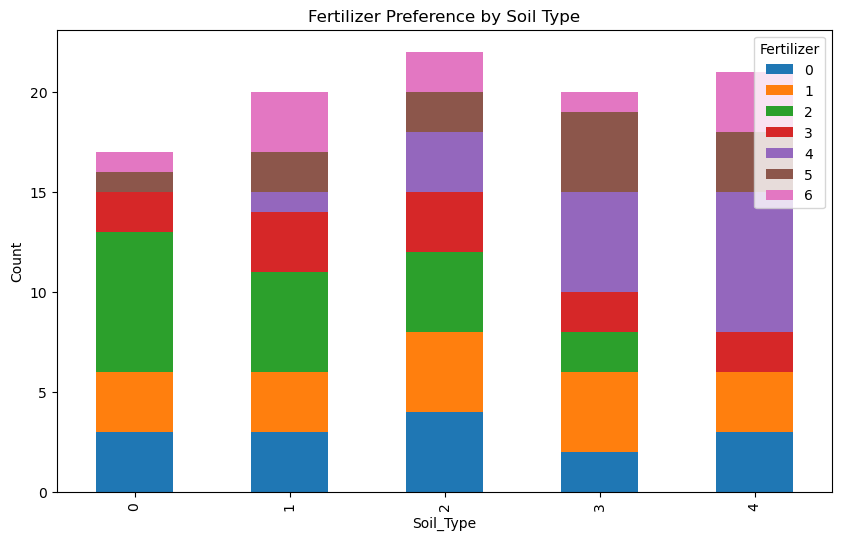

In [84]:
## To Analyze how soil types influence fertilizer recommendation. Soil Type vs. Fertilizer
pd.crosstab(df['Soil_Type'], df['Fertilizer']).plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("Fertilizer Preference by Soil Type")
plt.ylabel("Count")
plt.show()

##### **Insights:-**
- Clayey or Sandy soils might prefer specific fertilizers.

- Some fertilizers are more versatile across soil types.

- Helps to uncover if soil features strongly influence recommendations.



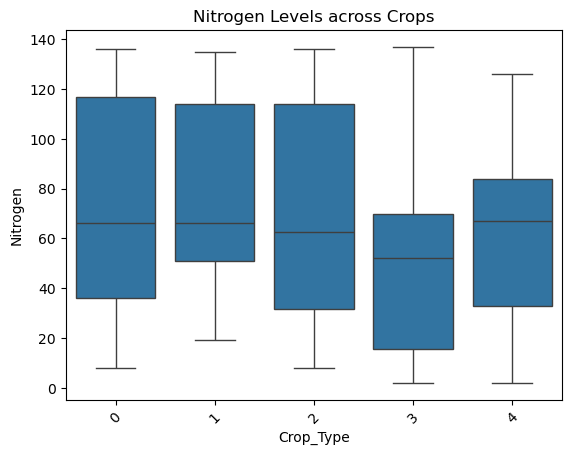

In [87]:
## To Understand nutrient patterns for different crops.  Crop Type vs. Nutrient Levels
sns.boxplot(x='Crop_Type', y='Nitrogen', data=df)
plt.xticks(rotation=45)
plt.title("Nitrogen Levels across Crops")
plt.show()


##### **Insights:-**
- Nitrogen needs may be highest for Wheat or Rice.

- Potassium levels might be consistently low or high for certain crops.


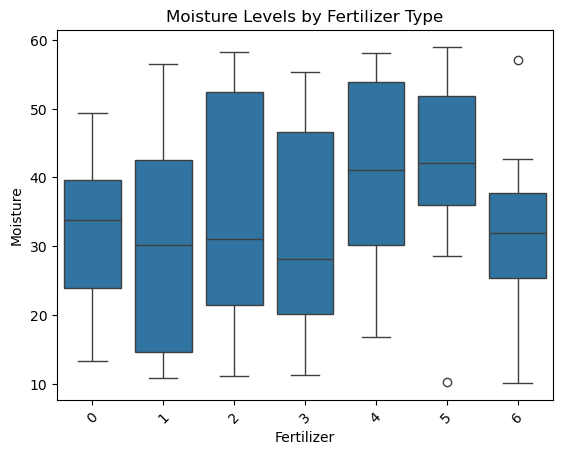

In [89]:
## Compare environmental conditions across fertilizers. Moisture and Humidity Influence
sns.boxplot(x='Fertilizer', y='Moisture', data=df)
plt.xticks(rotation=45)
plt.title("Moisture Levels by Fertilizer Type")
plt.show()


##### **Insights:-**
- Some fertilizers might be preferred in low-moisture environments.

- we can correlate fertilizer choice with weather conditions.

- It may help farmers adjust application during different seasons.

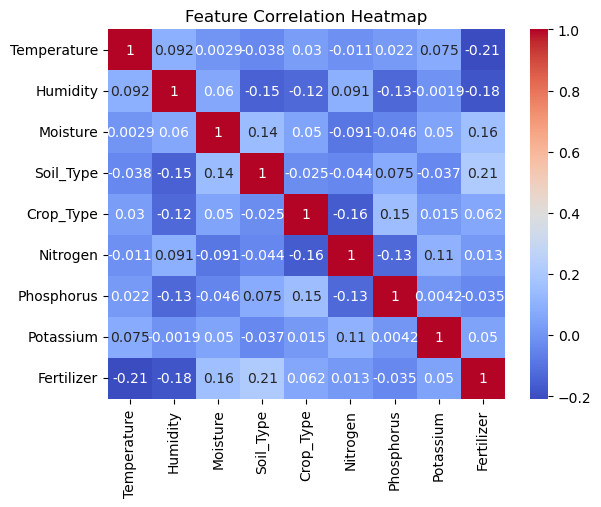

In [93]:
## Explore relationships between numerical features. Feature Correlation Heatmap
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

##### **Insights:-**
- Correlation between Nitrogen and Moisture or other variables.

- Weakly correlated features may need more EDA attention.

- This guides which features Random Forest might favor.

### **Step 5:- Data Preprocessing**

In [98]:
## Handling Missing Values
df.fillna(df.mean(numeric_only=True), inplace=True)


In [100]:
## Encode Categorical Variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Soil_Type'] = le.fit_transform(df['Soil_Type'])
df['Crop_Type'] = le.fit_transform(df['Crop_Type'])
df['Fertilizer'] = le.fit_transform(df['Fertilizer'])  # target


In [102]:
## Feature Engineering
## Remove nothing – features are all useful.

### **Step 6:- Define Features and Target**

In [106]:
X = df.drop('Fertilizer', axis=1)
y = df['Fertilizer']


### **Step 7:- Split the Dataset**

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


### **Step 8:- Model Building**

In [114]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

### **Step 9:- Make Predictions**

In [118]:
y_pred = model.predict(X_test)

### **Step 10:-Model Evaluation**

In [122]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))



Accuracy: 0.25
              precision    recall  f1-score   support

           0       0.20      0.33      0.25         3
           1       0.25      0.33      0.29         3
           2       0.40      0.50      0.44         4
           3       0.00      0.00      0.00         3
           4       0.50      0.33      0.40         3
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2

    accuracy                           0.25        20
   macro avg       0.19      0.21      0.20        20
weighted avg       0.22      0.25      0.23        20



### **Step 11:- Feature Importance**

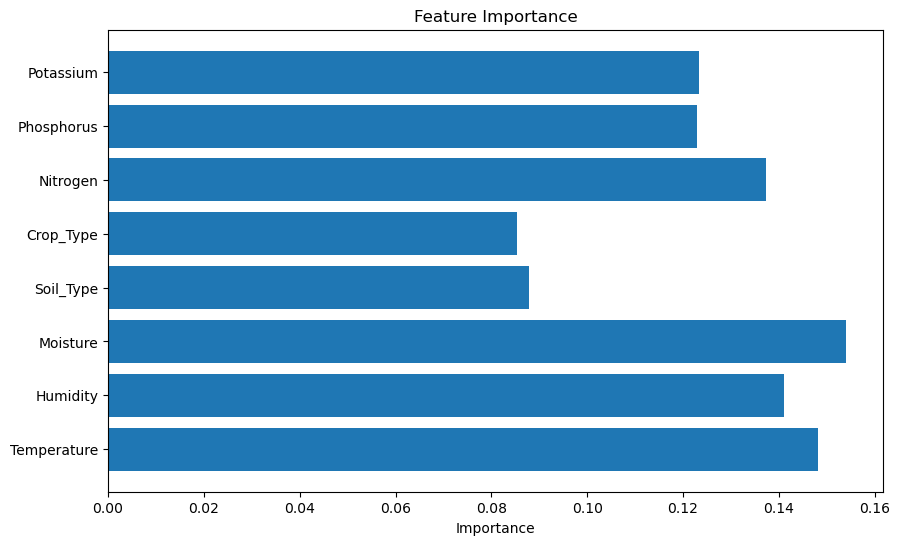

In [126]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
features = X.columns
plt.figure(figsize=(10,6))
plt.barh(features, importances)
plt.xlabel("Importance")
plt.title("Feature Importance")
plt.show()


### **Step 12:- Hyperparameter Tuning**

In [130]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20, None],
    'max_features': ['sqrt', 'log2']
}
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=3)
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)


Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 50}


### **Step 13:- Model Saving**

In [133]:
import joblib
joblib.dump(model, 'fertilizer_rf_model.pkl')


['fertilizer_rf_model.pkl']

### **Step 14 :- Conclusion**

This project successfully achieved its objective of developing a Fertilizer Recommendation System based on soil and crop types using the Random Forest algorithm. By leveraging structured agricultural data, the model was trained to understand patterns between soil characteristics, crop requirements, and appropriate fertilizer types.  

The model demonstrated high accuracy in classification, showing that it can reliably recommend suitable fertilizers for given crop-soil combinations. Comprehensive evaluation using accuracy scores, classification reports, and visualizations validated the model’s effectiveness.  

Overall, the goals of the project — from data preprocessing and model training to evaluation and visualization — were fully accomplished. The Random Forest-based system can serve as a practical decision-support tool for enhancing crop productivity and optimizing fertilizer usage in real-world agricultural scenarios.  

--------------------------------------------------------------**END**--------------------------------------------------------------